<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez
<br>
<i><b>Asignatura:</b></i> Aprendizaje de Maquina
<br>
<i><b>Tema:</b></i> Primer Parcial
<br>
<i><b>Estudiantes: </b> </i>
<li>Juan Esteban Arias</li>
<li>Christian David Jiménez</li>
</FONT>
</div>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv",
                 usecols=["Glucose", "Pregnancies" , "BloodPressure", "Outcome"], nrows=30)
df = df.reindex(columns=["Glucose", "Pregnancies" , "BloodPressure", "Outcome"])

<FONT FACE='times new roman'>
<h1><b>Parte 1</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Realizar validación cruzada de cv=3 para un árbol de decisión clasificador de max_depth=3:<br><br>
En cada CV  encontrar un árbol de decisión de max_depth=3 utilizando entropía. Mostrar cada árbol resultante, evaluar Accuracy en train y Accuracy en validación.
En cada proceso de entrenamiento se debe mostrar la entropía para todos los posibles condicionales y cuál se escogió.(8 puntos)
</p>

In [ ]:
# Funcion de entropia
def entropia(proba1,proba2):
  if proba1 == 0 or proba2 == 0:
    return 0
  else:
    return -((proba1)*math.log2(proba1)+(proba2*math.log2(proba2)))

# Entropia total
def entropiaTotal(proba1,entropia1,proba2,entropia2):
  return (proba1*entropia1)+(proba2*entropia2)

In [ ]:
# Funcion para obtener la entropia de cada condicional
def sacar_entropias(df_organizado, columna):

  entropias = {}
  tamaño = len(df_organizado)
  df_organizado = df_organizado.sort_values(by=df_organizado.columns[columna], ascending=True).reset_index(drop=True)

  for i in range(1,tamaño):

    if df_organizado.iloc[:,columna][i] != df_organizado.iloc[:,columna][i-1]:

      valor = (df_organizado.iloc[:,columna][i]+df_organizado.iloc[:,columna][i-1])/2

      C0_si = df_organizado[:i]["Outcome"].eq(0).sum()
      C1_si = df_organizado[:i]["Outcome"].eq(1).sum()
      C0_no = df_organizado[i:]["Outcome"].eq(0).sum()
      C1_no = df_organizado[i:]["Outcome"].eq(1).sum()

      entropia1 = entropia(C0_si/i,C1_si/i)
      entropia2 = entropia(C0_no/(tamaño-i), C1_no/(tamaño-i))
      entropias[valor] = entropiaTotal(i/tamaño,entropia1,(tamaño-i)/tamaño,entropia2)

  return entropias

<FONT FACE='times new roman'>
<h1><b>Experimento 1 (CV1)</b></h1>
<p align='justify'>
<FONT SIZE = 4>
En este experimento se coge el grupo 1 y grupo 2 como valores de entrenamiento, y el grupo 3 para los valores de prueba
</p>

<FONT FACE='times new roman'>
<h2><b>Primer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para encontrar el condicional que minimice la entropía, debemos realizar el proceso utilizando las tres variables del dataframe. En total, se deben realizar 19 condicionales por variable en el primer nivel.
</p>


In [ ]:
# Segmentamos los datos en df_cv1 para el primer nivel del arbol
df_cv1 = df[:20]

In [ ]:
# Sacamos los valores de entropia para la variable BloodPressure
entropias = sacar_entropias(df_cv1,2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 0.9264662506490406
BloodPressure <= 35.0: 0.8806282660164275
BloodPressure <= 45.0: 0.916830586027646
BloodPressure <= 55.0: 0.9314595241545343
BloodPressure <= 62.0: 0.9336889212857886
BloodPressure <= 65.0: 0.9268959920681902
BloodPressure <= 68.0: 0.9109272420695401
BloodPressure <= 71.0: 0.9333462928548724
BloodPressure <= 73.0: 0.9236494137546574
BloodPressure <= 77.0: 0.916830586027646
BloodPressure <= 82.0: 0.9339116497041016
BloodPressure <= 88.0: 0.9264662506490406
BloodPressure <= 94.0: 0.901979414618551

El menor valor de entropia es: 0.8806282660164275


In [ ]:
# Sacamos los valores de entropia para la variable Pregnancies
entropias = sacar_entropias(df_cv1,1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.8676708883274061
Pregnancies <= 1.5: 0.9236494137546574
Pregnancies <= 2.5: 0.9327511016026797
Pregnancies <= 3.5: 0.9333462928548724
Pregnancies <= 4.5: 0.9261207468426806
Pregnancies <= 5.5: 0.9124325037743448
Pregnancies <= 6.5: 0.9268959920681902
Pregnancies <= 7.5: 0.9314595241545343
Pregnancies <= 9.0: 0.8806282660164275

El menor valor de entropia es: 0.8676708883274061


In [ ]:
# Sacamos los valores de entropia para la variable Glucosa
entropias = sacar_entropias(df_cv1,0)
for valor, entropiaT in entropias.items():
  print(f"Glucosa <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucosa <= 81.5: 0.901979414618551
Glucosa <= 87.0: 0.9264662506490406
Glucosa <= 94.5: 0.8806282660164275
Glucosa <= 101.5: 0.916830586027646
Glucosa <= 105.0: 0.8702182050695426
Glucosa <= 108.5: 0.9041843979966417
Glucosa <= 112.5: 0.8514072418518432
Glucosa <= 115.5: 0.822205366528673
Glucosa <= 117.0: 0.7199730940219748
Glucosa <= 121.5: 0.7731828669613667
Glucosa <= 131.0: 0.8174257772798386
Glucosa <= 138.0: 0.8543083163590162
Glucosa <= 143.5: 0.7
Glucosa <= 157.0: 0.7475937239862274
Glucosa <= 167.0: 0.790959526630798
Glucosa <= 175.5: 0.8308051448989459
Glucosa <= 186.0: 0.8676708883274061
Glucosa <= 193.0: 0.901979414618551

El menor valor de entropia es: 0.7


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El primer nivel del árbol tendrá el condicional "Glucose <= 143.5" el cual tuvo una entropía de 0.7.
</p>

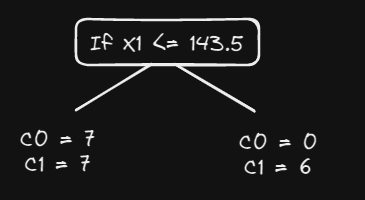

<FONT FACE='times new roman'>
<h2><b>Segundo nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Una vez obtenemos el mejor condicional para el primer nivel del árbol, seleccionamos los primeros 14 datos del dataframe para realizar los demás condicionales.
</p>

In [ ]:
# Creamos el dataframe para el segundo nivel del arbol, a partir de df_cv1
df_cv1_2 = df_cv1.sort_values(by="Glucose", ascending=True)[:14]

In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv1_2,2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 1.0
BloodPressure <= 35.0: 0.9778014163149993
BloodPressure <= 45.0: 1.0
BloodPressure <= 58.0: 0.9838883936298103
BloodPressure <= 68.0: 0.9852281360342515
BloodPressure <= 72.0: 1.0
BloodPressure <= 77.0: 1.0
BloodPressure <= 82.0: 0.9778014163149993
BloodPressure <= 88.0: 1.0
BloodPressure <= 94.0: 0.924604062650288

El menor valor de entropia es: 0.924604062650288


In [ ]:
# Sacamos los valores de entropia para Glucose
entropias = sacar_entropias(df_cv1_2,0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 81.5: 0.924604062650288
Glucose <= 87.0: 1.0
Glucose <= 94.5: 0.9778014163149993
Glucose <= 101.5: 1.0
Glucose <= 105.0: 0.9838883936298103
Glucose <= 108.5: 1.0
Glucose <= 112.5: 0.9852281360342515
Glucose <= 115.5: 0.9838883936298103
Glucose <= 117.0: 0.9253298887416583
Glucose <= 121.5: 0.9778014163149993
Glucose <= 131.0: 1.0
Glucose <= 138.0: 0.924604062650288

El menor valor de entropia es: 0.924604062650288


In [ ]:
# Sacamos los valores de entropia para df_cv1_2
entropias = sacar_entropias(df_cv1_2,1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.839887505700988
Pregnancies <= 2.0: 1.0
Pregnancies <= 3.5: 0.9852281360342515
Pregnancies <= 4.5: 1.0
Pregnancies <= 6.0: 0.9838883936298103
Pregnancies <= 7.5: 0.9778014163149993
Pregnancies <= 9.0: 0.839887505700988

El menor valor de entropia es: 0.839887505700988


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El segundo nivel del árbol tendrá el condicional "Pregnancies <= 0.5" el cual tuvo una entropía de 0.83988.
</p>

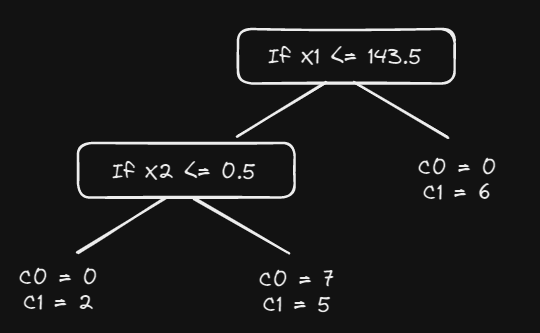

<FONT FACE='times new roman'>
<h2><b>Tercer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para el último nivel del árbol, utilizamos los 12 datos del dataframe df_cv1_2 para realizar los últimos condicionales.
</p>

In [ ]:
# Creamos el dataframe para el tercer nivel del arbol, a partir de df_cv1_2
df_cv1_3 = df_cv1_2.sort_values(by="Pregnancies", ascending=True)[2:]

In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv1_3,2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 0.9757921620455572
BloodPressure <= 40.0: 0.9728810033922891
BloodPressure <= 58.0: 0.9696226686166434
BloodPressure <= 68.0: 0.9591479170272448
BloodPressure <= 72.0: 0.979279160376092
BloodPressure <= 77.0: 0.9728810033922891
BloodPressure <= 86.0: 0.9757921620455572
BloodPressure <= 94.0: 0.8668552792172534

El menor valor de entropia es: 0.8668552792172534


In [ ]:
# Sacamos los valores de entropia para Glucose
entropias = sacar_entropias(df_cv1_3,0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 81.5: 0.8668552792172534
Glucose <= 87.0: 0.9757921620455572
Glucose <= 94.5: 0.9728810033922891
Glucose <= 101.5: 0.9696226686166434
Glucose <= 105.0: 0.979279160376092
Glucose <= 108.5: 0.9591479170272448
Glucose <= 112.5: 0.979279160376092
Glucose <= 115.5: 0.9728810033922891
Glucose <= 120.5: 0.9757921620455572
Glucose <= 132.0: 0.9111943605205434

El menor valor de entropia es: 0.8668552792172534


In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv1_3,1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 2.0: 0.9370927081530442
Pregnancies <= 3.5: 0.979279160376092
Pregnancies <= 4.5: 0.9591479170272448
Pregnancies <= 6.0: 0.9080497460199801
Pregnancies <= 7.5: 0.9728810033922891
Pregnancies <= 9.0: 0.8333333333333334

El menor valor de entropia es: 0.8333333333333334


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El tercer nivel del árbol tendrá el condicional "Pregnancies <= 9.0" el cual tuvo una entropía de 0.8333333.
</p>

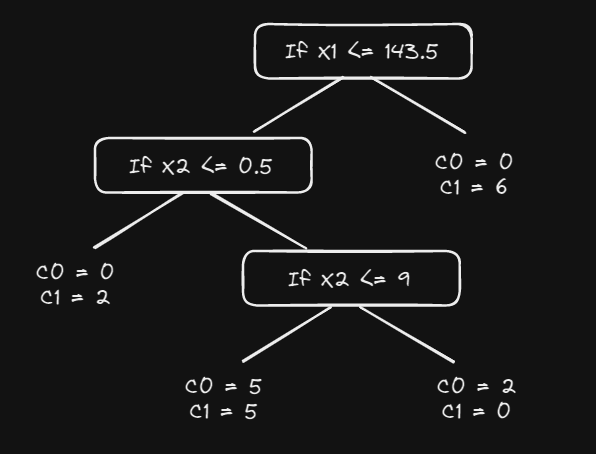

In [ ]:
def accuracy_1(df_acc):
  accuracy = 0
  df_acc = df_acc.reset_index(drop=True)
  for i in range(len(df_acc)):
    if df_acc.iloc[:,0][i] <= 143.5:
      if df_acc.iloc[:,1][i] <= 0.5 and df_acc.iloc[:,3][i] == 1:
        accuracy+=1
      elif df_acc.iloc[:,1][i] <= 9 and df_acc.iloc[:,3][i] == 0:
          accuracy+=1
      elif df_acc.iloc[:,3][i] == 0:
        accuracy+=1
    elif df_acc.iloc[:,3][i] == 1:
      accuracy+=1
  return f"Accuracy -> {(accuracy/len(df_acc))}"
print(f"Train -> {accuracy_1(df[:20])}")
print(f"Test -> {accuracy_1(df[20:])}")

Train -> Accuracy -> 0.75
Test -> Accuracy -> 0.6


<FONT FACE='times new roman'>
<h1><b>Experimento 2 (CV2)</b></h1>
<p align='justify'>
<FONT SIZE = 4>
En este experimento se coge el grupo 2 y grupo 3 como valores de entrenamiento, y el grupo 1 para los valores de prueba.
</p>


<FONT FACE='times new roman'>
<h2><b>Primer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para encontrar el condicional que minimice la entropía, debemos realizar el proceso utilizando las tres variables del dataframe. En total, se deben realizar 19 condicionales por variable en el primer nivel.
</p>

In [ ]:
# Segmentamos los datos en df_cv2 para el segundo experimento
df_cv2 = df[10:]

In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv2, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.9328437475208927
Pregnancies <= 2.0: 0.9709505944546686
Pregnancies <= 3.5: 0.9582001710694417
Pregnancies <= 4.5: 0.9236494137546574
Pregnancies <= 6.0: 0.9109272420695401
Pregnancies <= 7.5: 0.9696336406818573
Pregnancies <= 8.5: 0.965148445440323
Pregnancies <= 9.5: 0.9709505944546686
Pregnancies <= 10.5: 0.9676708883274061
Pregnancies <= 12.0: 0.901979414618551

El menor valor de entropia es: 0.901979414618551


In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv2, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 0.9328437475208927
BloodPressure <= 45.0: 0.9676708883274061
BloodPressure <= 63.0: 0.9685495200071192
BloodPressure <= 68.0: 0.963547202339972
BloodPressure <= 71.0: 0.965148445440323
BloodPressure <= 73.0: 0.9493150428535224
BloodPressure <= 75.0: 0.8906086442412053
BloodPressure <= 78.0: 0.8464393446710154
BloodPressure <= 81.0: 0.8685404758454658
BloodPressure <= 83.0: 0.9236494137546574
BloodPressure <= 86.0: 0.9314595241545343
BloodPressure <= 89.0: 0.963547202339972
BloodPressure <= 91.0: 0.9339116497041016
BloodPressure <= 93.0: 0.9328437475208927

El menor valor de entropia es: 0.8464393446710154


In [ ]:
# Sacamos los valores de entropia para Glucosa
entropias = sacar_entropias(df_cv2, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucosa <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucosa <= 98.0: 0.901979414618551
Glucosa <= 99.5: 0.8264662506490407
Glucosa <= 101.5: 0.9339116497041016
Glucosa <= 105.0: 0.8790862109194725
Glucosa <= 108.5: 0.9314595241545343
Glucosa <= 112.5: 0.8796731482129885
Glucosa <= 116.0: 0.9236494137546574
Glucosa <= 117.5: 0.8685404758454658
Glucosa <= 118.5: 0.9109272420695401
Glucosa <= 122.0: 0.9406454496153464
Glucosa <= 125.5: 0.9599497416368465
Glucosa <= 132.5: 0.9245112497836532
Glucosa <= 141.0: 0.8543083163590162
Glucosa <= 144.0: 0.8950067264945062
Glucosa <= 146.0: 0.7475937239862274
Glucosa <= 156.5: 0.8
Glucosa <= 167.0: 0.8478771644137478
Glucosa <= 178.5: 0.8919684538544
Glucosa <= 192.5: 0.9328437475208927

El menor valor de entropia es: 0.7475937239862274


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El primer nivel del árbol tendrá el condicional "Glucosa <= 146.0" el cual tuvo una entropía de 0.747593.
</p>

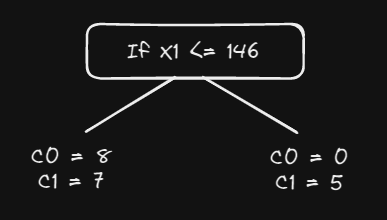

<FONT FACE='times new roman'>
<h2><b>Segundo nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Una vez obtenemos el mejor condicional para el primer nivel del árbol, seleccionamos los primeros 15 datos del dataframe para realizar los demás condicionales.
</p>

In [ ]:
# Creamos el dataframe para el segundo nivel del arbol, a partir de df_cv2
df_cv2_2 = df_cv2.sort_values(by="Glucose", ascending=True)[:15]

In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv2_2, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.9195462602986347
Pregnancies <= 2.0: 0.9956221550831013
Pregnancies <= 3.5: 0.9903168648182228
Pregnancies <= 4.5: 0.9619639695247291
Pregnancies <= 6.0: 0.9118210668910758
Pregnancies <= 7.5: 0.9946456359029333
Pregnancies <= 8.5: 0.9709505944546685
Pregnancies <= 9.5: 0.9956221550831013
Pregnancies <= 10.5: 0.9962971251402688
Pregnancies <= 12.0: 0.9333333333333333

El menor valor de entropia es: 0.9118210668910758


In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv2_2, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 0.9195462602986347
BloodPressure <= 48.0: 0.9962971251402688
BloodPressure <= 68.0: 0.9836591668108979
BloodPressure <= 72.0: 0.9709505944546685
BloodPressure <= 77.0: 0.9182958340544896
BloodPressure <= 81.0: 0.9118210668910758
BloodPressure <= 83.0: 0.9619639695247291
BloodPressure <= 86.0: 0.9452963216055368
BloodPressure <= 90.0: 0.9836591668108979
BloodPressure <= 93.0: 0.9195462602986347

El menor valor de entropia es: 0.9118210668910758


In [ ]:
# Sacamos los valores de entropia para Glucosa
entropias = sacar_entropias(df_cv2_2, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucosa <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucosa <= 98.0: 0.9333333333333333
Glucosa <= 99.5: 0.8629637918069355
Glucosa <= 101.5: 0.9836591668108979
Glucosa <= 105.0: 0.9452963216055368
Glucosa <= 108.5: 0.9903168648182228
Glucosa <= 112.5: 0.9619639695247291
Glucosa <= 116.0: 0.9931064634826507
Glucosa <= 117.5: 0.9688045983759654
Glucosa <= 118.5: 0.9946456359029333
Glucosa <= 122.0: 0.9903168648182228
Glucosa <= 125.5: 0.9452963216055368
Glucosa <= 132.5: 0.9836591668108979
Glucosa <= 141.0: 0.9962971251402688
Glucosa <= 144.0: 0.9333333333333333

El menor valor de entropia es: 0.8629637918069355


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El segundo nivel del árbol tendrá el condicional "Glucosa <= 99.5" el cual tuvo una entropía de 0.86296379.
</p>

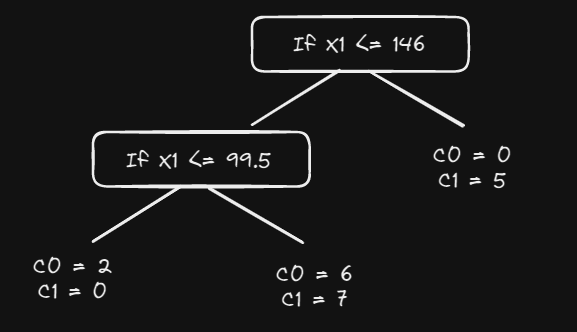

<FONT FACE='times new roman'>
<h2><b>Tercer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para el último nivel del árbol, utilizamos los 13 datos del dataframe df_cv1_2 para realizar los últimos condicionales.
</p>

In [ ]:
# Creamos el dataframe para el tercer nivel del arbol, a partir de df_cv2_2
df_cv2_3 = df_cv2_2[2:]

In [ ]:
# Sacamos los valores de entropia para Glucose
entropias = sacar_entropias(df_cv2_3, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 101.5: 0.9230769230769231
Glucose <= 105.0: 0.9949486404805016
Glucose <= 108.5: 0.981145192474113
Glucose <= 112.5: 0.9938218875803077
Glucose <= 116.0: 0.9888271517133341
Glucose <= 117.5: 0.9920459194030585
Glucose <= 118.5: 0.9920459194030585
Glucose <= 122.0: 0.9607865381286972
Glucose <= 125.5: 0.8853673080251491
Glucose <= 132.5: 0.9587994959007812
Glucose <= 141.0: 0.9949486404805016
Glucose <= 144.0: 0.9044942369087565

El menor valor de entropia es: 0.8853673080251491


In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv2_3, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.9230769230769231
Pregnancies <= 2.0: 0.981145192474113
Pregnancies <= 3.5: 0.9938218875803077
Pregnancies <= 4.5: 0.9607865381286972
Pregnancies <= 6.0: 0.8885860757148734
Pregnancies <= 8.0: 0.9888271517133341
Pregnancies <= 9.5: 0.9938218875803077
Pregnancies <= 10.5: 0.9949486404805016
Pregnancies <= 12.0: 0.9044942369087565

El menor valor de entropia es: 0.8885860757148734


In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv2_3, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 15.0: 0.9230769230769231
BloodPressure <= 50.0: 0.9949486404805016
BloodPressure <= 72.0: 0.9357536181831178
BloodPressure <= 77.0: 0.8650086536797332
BloodPressure <= 81.0: 0.8885860757148734
BloodPressure <= 83.0: 0.9607865381286972
BloodPressure <= 86.0: 0.8853673080251491
BloodPressure <= 90.0: 0.9587994959007812
BloodPressure <= 93.0: 0.9230769230769231

El menor valor de entropia es: 0.8650086536797332


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El tercer nivel del árbol tendrá el condicional "BloodPressure <= 77.0" el cual tuvo una entropía de 0.865008.
</p>

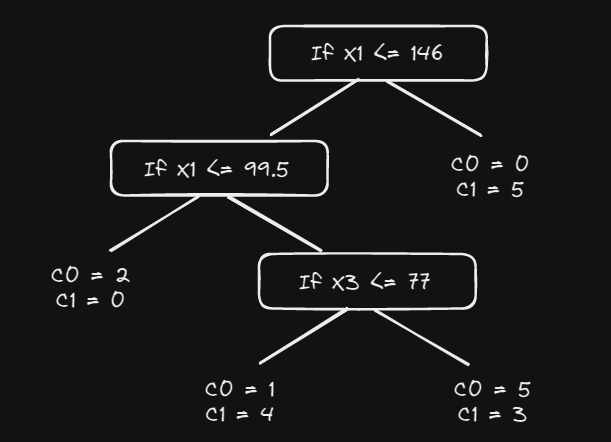

In [ ]:
def accuracy_2(df_acc):
  accuracy = 0
  df_acc = df_acc.reset_index(drop=True)
  for i in range(len(df_acc)):
    if df_acc.iloc[:,0][i] <= 146:
        if df_acc.iloc[:,0][i] <= 99.5:
          if df_acc.iloc[:,3][i] == 0:
            accuracy+=1
        else:
          if df_acc.iloc[:,2][i] <= 77:
            if df_acc.iloc[:,3][i] == 1:
              accuracy+=1
          else:
            if df_acc.iloc[:,3][i] == 0:
              accuracy+=1
    elif df_acc.iloc[:,3][i] == 1:
      accuracy+=1
  return f"Accuracy -> {(accuracy/len(df_acc))}"

print(f"Train -> {accuracy_2(df[10:])}" )
print(f"Test -> {accuracy_2(df[:10])}")

Train -> Accuracy -> 0.8
Test -> Accuracy -> 0.6


<FONT FACE='times new roman'>
<h1><b>Experimento 3 (CV3)</b></h1>
<p align='justify'>
<FONT SIZE = 4>
En este experimento se coge el grupo 1 y grupo 3 como valores de entrenamiento, y el grupo 2 para los valores de prueba.
</p>

<FONT FACE='times new roman'>
<h2><b>Primer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para encontrar el condicional que minimice la entropía, debemos realizar el proceso utilizando las tres variables del dataframe. En total, se deben realizar 19 condicionales por variable en el primer nivel.
</p>

In [ ]:
# Segmentamos y organizamos los datos en df_cv3 para el tercer experimento
df_cv3 = pd.concat([df[:10],df[20:]])

In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv3, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 20.0: 0.9328437475208927
BloodPressure <= 45.0: 0.9919684538544
BloodPressure <= 57.0: 0.9856215395219212
BloodPressure <= 65.0: 0.9622556248918266
BloodPressure <= 68.0: 0.9696336406818573
BloodPressure <= 71.0: 0.9927008432395261
BloodPressure <= 73.0: 0.9854752972273343
BloodPressure <= 75.0: 0.9927008432395261
BloodPressure <= 78.0: 0.9879212539906916
BloodPressure <= 81.0: 0.9696336406818573
BloodPressure <= 83.0: 0.989659695223976
BloodPressure <= 86.0: 0.9903313725998946
BloodPressure <= 89.0: 0.9622556248918266
BloodPressure <= 91.0: 0.9856215395219212
BloodPressure <= 93.0: 0.9
BloodPressure <= 95.0: 0.9481008396786845

El menor valor de entropia es: 0.9


In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv3, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 0.5: 0.9481008396786845
Pregnancies <= 1.5: 0.9258028272317986
Pregnancies <= 2.5: 0.9709505944546686
Pregnancies <= 4.0: 0.9696336406818573
Pregnancies <= 5.5: 0.8781761404668604
Pregnancies <= 6.5: 0.9261207468426806
Pregnancies <= 7.5: 0.981773601169986
Pregnancies <= 8.5: 0.9903313725998946
Pregnancies <= 9.5: 0.990959526630798
Pregnancies <= 10.5: 0.9919684538544
Pregnancies <= 12.0: 0.9328437475208927

El menor valor de entropia es: 0.8781761404668604


In [ ]:
# Sacamos los valores de entropia para df_cv3
entropias = sacar_entropias(df_cv3, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucosa <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucosa <= 81.5: 0.9481008396786845
Glucosa <= 87.0: 0.9919684538544
Glucosa <= 93.0: 0.9685495200071192
Glucosa <= 98.0: 0.9258028272317986
Glucosa <= 107.0: 0.8692038992627078
Glucosa <= 115.5: 0.7991911244911479
Glucosa <= 116.5: 0.7136628667436699
Glucosa <= 118.0: 0.607439230268851
Glucosa <= 122.0: 0.720113167530352
Glucosa <= 125.5: 0.8640051954592312
Glucosa <= 131.5: 0.7684032777125323
Glucosa <= 140.0: 0.8318892655736839
Glucosa <= 144.0: 0.8846664217184823
Glucosa <= 146.0: 0.7282129458410014
Glucosa <= 147.5: 0.790959526630798
Glucosa <= 165.5: 0.8478771644137478
Glucosa <= 189.5: 0.9
Glucosa <= 196.5: 0.9481008396786845

El menor valor de entropia es: 0.607439230268851


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El primer nivel del árbol tendrá el condicional "Glucosa <= 118.0" el cual tuvo una entropía de 0.60743.
</p>

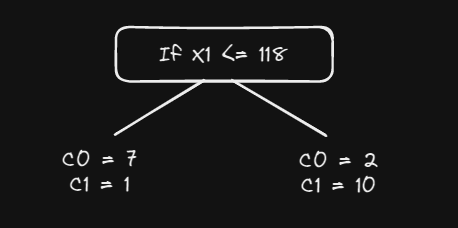

<FONT FACE='times new roman'>
<h2><b>Segundo nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Una vez obtenemos el mejor condicional para el primer nivel del árbol, separamos los primeros 8 datos del dataframe y los 12 datos restantes para generar las dos ramas del segundo nivel. En este caso, se debe repetir este proceso para ambas partes del árbol, ya que no se ha obtenido una estructura completamente organizada con un valor de entropía igual a 0.
</p>

In [ ]:
# Creamos el dataframe para el segundo nivel del arbol, a partir de df_cv3
df_cv3_2 = df_cv3.sort_values(by="Glucose", ascending=True)[:8]

In [ ]:
# Sacamos los valores de entropia para Pregnancies (primera parte del nivel)
entropias = sacar_entropias(df_cv3_2, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 2.0: 0.4512050593046014
Pregnancies <= 4.0: 0.4056390622295664
Pregnancies <= 6.5: 0.4875168162362656
Pregnancies <= 9.0: 0.5177136812595365

El menor valor de entropia es: 0.4056390622295664


In [ ]:
# Sacamos los valores de entropia para BloodPressure (primera parte del nivel)
entropias = sacar_entropias(df_cv3_2, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 25.0: 0.5177136812595365
BloodPressure <= 58.0: 0.25
BloodPressure <= 70.0: 0.4512050593046014
BloodPressure <= 79.0: 0.4875168162362656
BloodPressure <= 88.0: 0.5177136812595365

El menor valor de entropia es: 0.25


In [ ]:
# Sacamos los valores de entropia para Glucose (primera parte del nivel)
entropias = sacar_entropias(df_cv3_2, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 81.5: 0.0
Glucose <= 87.0: 0.25
Glucose <= 93.0: 0.3443609377704336
Glucose <= 98.0: 0.4056390622295664
Glucose <= 107.0: 0.4512050593046014
Glucose <= 115.5: 0.4875168162362656
Glucose <= 116.5: 0.5177136812595365

El menor valor de entropia es: 0.0


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El segundo nivel del árbol tendrá el condicional "Glucosa <= 0.0" el cual tuvo una entropía de 0.0.
</p>

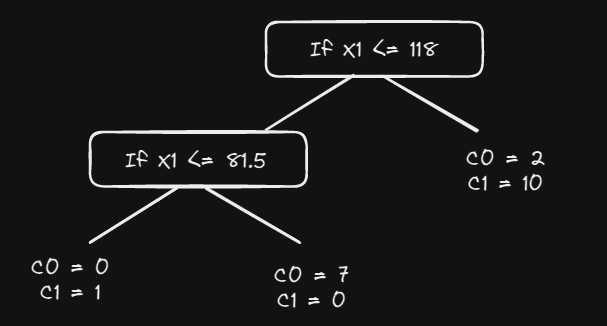

In [ ]:
# Creamos el dataframe para el segundo nivel del arbol, a partir de df_cv3
df_cv3_2 = df_cv3.sort_values(by="Glucose", ascending=True)[8:]

In [ ]:
# Sacamos los valores de entropia para BloodPressure (segunda parte del nivel)
entropias = sacar_entropias(df_cv3_2,2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 52.0: 0.6270352326691215
BloodPressure <= 67.0: 0.6016067457394686
BloodPressure <= 71.0: 0.5408520829727552
BloodPressure <= 74.0: 0.5034869983305348
BloodPressure <= 78.0: 0.4591479170272448
BloodPressure <= 81.0: 0.4045627476894453
BloodPressure <= 85.0: 0.6328023369527752
BloodPressure <= 89.0: 0.5731533798814652
BloodPressure <= 92.0: 0.6016067457394686
BloodPressure <= 95.0: 0.6270352326691215

El menor valor de entropia es: 0.4045627476894453


In [ ]:
# Sacamos los valores de entropia para Glucose (segunda parte del nivel)
entropias = sacar_entropias(df_cv3_2,0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 122.0: 0.6270352326691215
Glucose <= 125.5: 0.5731533798814652
Glucose <= 131.5: 0.6328023369527752
Glucose <= 140.0: 0.6459458270427587
Glucose <= 144.0: 0.6500224216483541
Glucose <= 146.0: 0.5034869983305348
Glucose <= 147.5: 0.5408520829727552
Glucose <= 165.5: 0.5731533798814652
Glucose <= 189.5: 0.6016067457394686
Glucose <= 196.5: 0.6270352326691215

El menor valor de entropia es: 0.5034869983305348


In [ ]:
# Sacamos los valores de entropia para Pregnancies (segunda parte del nivel)
entropias = sacar_entropias(df_cv3_2,1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 1.0: 0.6270352326691215
Pregnancies <= 2.5: 0.6016067457394686
Pregnancies <= 4.5: 0.6070177095953567
Pregnancies <= 6.5: 0.6328023369527752
Pregnancies <= 7.5: 0.6500224216483541
Pregnancies <= 8.5: 0.6328023369527752
Pregnancies <= 9.5: 0.6070177095953567
Pregnancies <= 10.5: 0.5574963279910677
Pregnancies <= 12.0: 0.4028722380113873

El menor valor de entropia es: 0.4028722380113873


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El segundo nivel del árbol tendrá el condicional "Pregnancies <= 12.0" el cual tuvo una entropía de 0.40287.
</p>

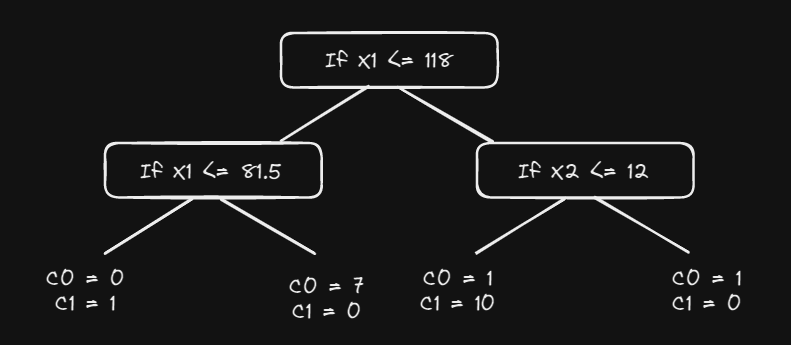

<FONT FACE='times new roman'>
<h2><b>Tercer nivel del arbol</b></h2>
<p align='justify'>
<FONT SIZE = 4>
Para el último nivel del árbol, utilizamos los 11 datos del dataframe df_cv1_2 para realizar los últimos condicionales.
</p>

In [ ]:
# Creamos el dataframe para el segundo nivel del arbol, a partir de df_cv3_2
df_cv3_3 = df_cv3_2.sort_values(by="Pregnancies", ascending=True)[:11]

In [ ]:
# Sacamos los valores de entropia para BloodPressure
entropias = sacar_entropias(df_cv3_3, 2)
for valor, entropiaT in entropias.items():
  print(f"BloodPressure <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

BloodPressure <= 52.0: 0.4263596305357102
BloodPressure <= 67.0: 0.411756819361892
BloodPressure <= 71.0: 0.37651904091602656
BloodPressure <= 74.0: 0.3545576845354659
BloodPressure <= 78.0: 0.32814913403971013
BloodPressure <= 84.0: 0.2950102270760483
BloodPressure <= 89.0: 0.39531959505425196
BloodPressure <= 92.0: 0.411756819361892
BloodPressure <= 95.0: 0.4263596305357102

El menor valor de entropia es: 0.2950102270760483


In [ ]:
# Sacamos los valores de entropia para Glucose
entropias = sacar_entropias(df_cv3_3, 0)
for valor, entropiaT in entropias.items():
  print(f"Glucose <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Glucose <= 122.0: 0.4263596305357102
Glucose <= 125.5: 0.39531959505425196
Glucose <= 131.5: 0.2950102270760483
Glucose <= 140.0: 0.32814913403971013
Glucose <= 145.0: 0.3545576845354659
Glucose <= 147.5: 0.37651904091602656
Glucose <= 165.5: 0.39531959505425196
Glucose <= 189.5: 0.411756819361892
Glucose <= 196.5: 0.4263596305357102

El menor valor de entropia es: 0.2950102270760483


In [ ]:
# Sacamos los valores de entropia para Pregnancies
entropias = sacar_entropias(df_cv3_3, 1)
for valor, entropiaT in entropias.items():
  print(f"Pregnancies <= {valor}: {entropiaT}")

# Se obtiene el menor valor de todas las entropias
print(f"\nEl menor valor de entropia es: {min(entropias.values())}")

Pregnancies <= 1.0: 0.4263596305357102
Pregnancies <= 2.5: 0.411756819361892
Pregnancies <= 4.5: 0.2504443183784971
Pregnancies <= 6.5: 0.2950102270760483
Pregnancies <= 7.5: 0.3545576845354659
Pregnancies <= 8.5: 0.39531959505425196
Pregnancies <= 9.5: 0.411756819361892
Pregnancies <= 10.5: 0.4263596305357102

El menor valor de entropia es: 0.2504443183784971


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
El segundo nivel del árbol tendrá el condicional "Pregnancies <= 4.5" el cual tuvo una entropía de 0.250444.
</p>

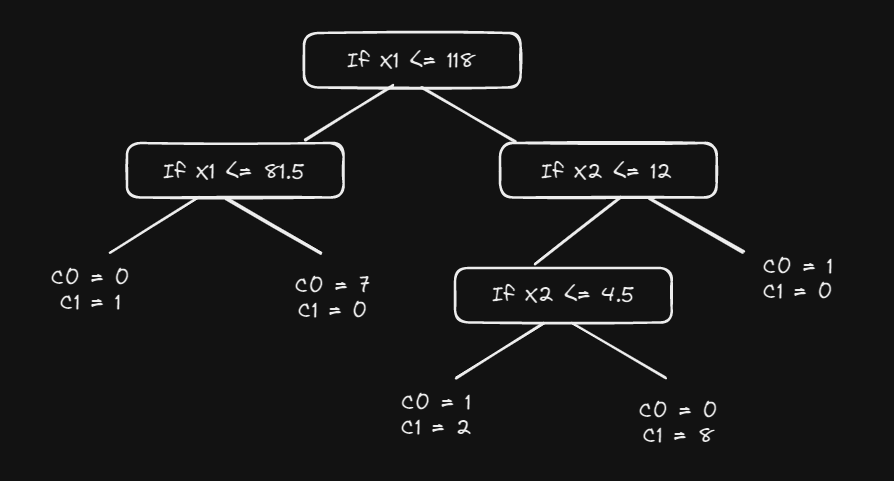

In [ ]:
def accuracy_3(df_acc):
  accuracy = 0
  df_acc = df_acc.reset_index(drop=True)
  for i in range(len(df_acc)):
    if df_acc.iloc[:,0][i] <= 118:
        if df_acc.iloc[:,0][i] <= 81.5 and df_acc.iloc[:,3][i] == 1:
          accuracy+=1
        elif df_acc.iloc[:,3][i] == 0:
          accuracy+=1
    else:
      if df_acc.iloc[:,1][i] <= 12:
        if df_acc.iloc[:,3][i] == 1:
          accuracy+=1
      else:
        if df_acc.iloc[:,3][i] == 0:
          accuracy+=1

  return f"Accuracy -> {(accuracy/len(df_acc))}"

print(f"Train -> {accuracy_3(pd.concat([df[:10],df[20:]]))}" )
print(f"Test -> {accuracy_3(df[10:20])}")

Train -> Accuracy -> 0.95
Test -> Accuracy -> 0.5


<FONT FACE='times new roman'>
<h1><b>Punto B</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Corroborar los resultados usando Sklearn (2 puntos)
</p>


<p align='justify'>
<FONT FACE='times new roman' SIZE = 4>
Este código utiliza la biblioteca scikit-learn de Python para definir un objeto KFold que divide los datos en tres partes y luego utiliza esta división para realizar la validación cruzada. Se utiliza un clasificador de árbol de decisión con el criterio de "entropía" y una profundidad máxima de 3 para predecir la clase de los datos. Se utiliza la métrica de precisión para evaluar el rendimiento del clasificador.
</p>


In [ ]:
from sklearn.model_selection import KFold
kf_cv = KFold(n_splits=3, shuffle=False)
r = cross_validate(DecisionTreeClassifier(criterion="entropy", max_depth=3),
                   df[["Glucose","Pregnancies","BloodPressure"]],df["Outcome"], cv=kf_cv.split(df),
                   return_estimator=True,
                   scoring=["accuracy"],
                   return_train_score=True,
                   )
r

{'fit_time': array([0.01096511, 0.00389075, 0.00362206]),
 'score_time': array([0.00328398, 0.00307775, 0.00272751]),
 'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3)],
 'test_accuracy': array([0.6, 0.5, 0.6]),
 'train_accuracy': array([0.8 , 0.95, 0.75])}

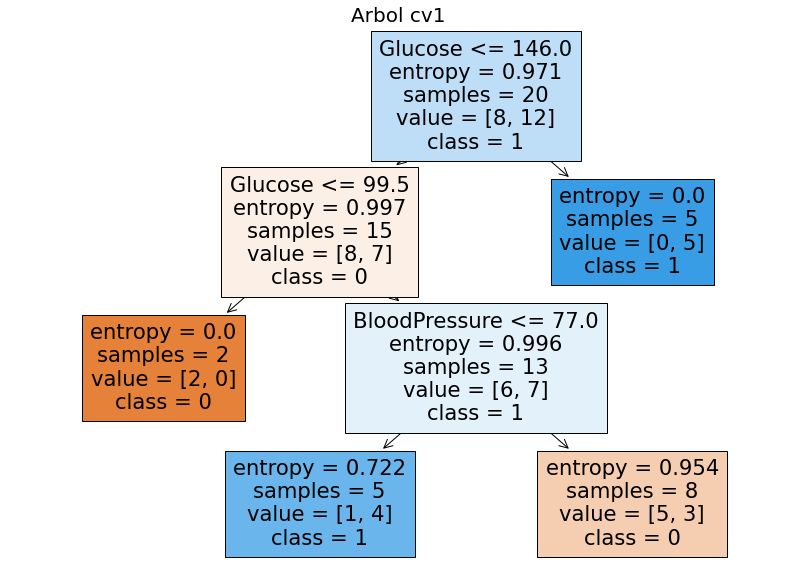

In [ ]:
# Arbol 1 generado por cross validation
plt.figure(figsize=(14,10))
plot_tree(r['estimator'][0],feature_names=["Glucose","Pregnancies","BloodPressure"],class_names=["0","1"],filled=True)
plt.title(f"Arbol cv1", fontsize=20)
plt.show()

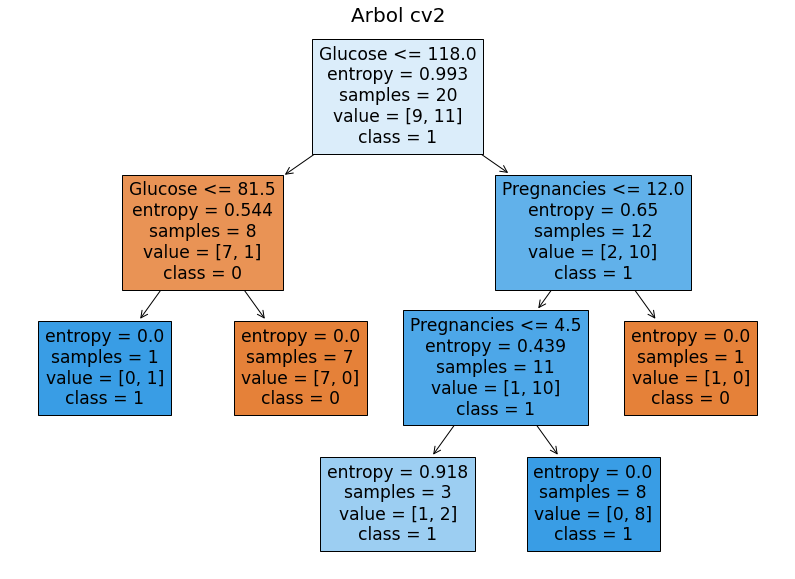

In [ ]:
# Arbol 2 generado por cross validation
plt.figure(figsize=(14,10))
plot_tree(r['estimator'][1],feature_names=["Glucose","Pregnancies","BloodPressure"],class_names=["0","1"],filled=True)
plt.title(f"Arbol cv2", fontsize=20)
plt.show()

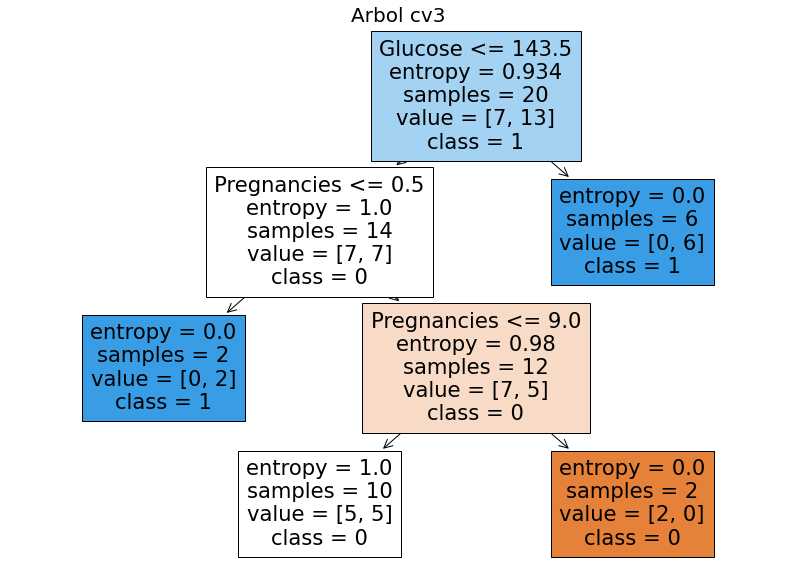

In [ ]:
# Arbol 3 generado por cross validation
plt.figure(figsize=(14,10))
plot_tree(r['estimator'][2],feature_names=["Glucose","Pregnancies","BloodPressure"],class_names=["0","1"],filled=True)
plt.title(f"Arbol cv3", fontsize=20)
plt.show()

<FONT FACE='times new roman'>
<h1><b>Punto C</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Dibujar la frontera de decisión a mano o en el notebook para el árbol de la primera cv.(No se pueden usar bibliotecas que realizan automáticamente este proceso).(5 puntos)
</p>

In [ ]:
#Se dividen los datos a través de la variable Outcome.
df = df.reindex(columns=["Pregnancies", "Glucose" , "BloodPressure", "Outcome"])
dfSI = []
dfNO =[]
for i in df[:20].values:
  if(i[3]==0):
    dfNO.append(i)
  else:
    dfSI.append(i)

In [ ]:
dfSI = pd.DataFrame(dfSI, columns=["Pregnancies","Glucose","BloodPressure","Outcome"])
dfNO = pd.DataFrame(dfNO, columns=["Pregnancies","Glucose","BloodPressure","Outcome"])

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

# Crear el grafico
fig.update_layout( scene=dict(xaxis_title='Pregnancies',
                             yaxis_title='Glucose',
                             zaxis_title='BloodPressure'),
                  width=1000,
                  height=500,
                  margin=dict(r=0, t=0, b=0,l=0),
                  template='plotly_dark'
                  )

#Graficar los puntos positivos
fig.add_trace(go.Scatter3d(x=dfSI['Pregnancies'], y=dfSI['Glucose'], z=dfSI['BloodPressure'],mode='markers', marker=dict(size=7), name='Clase Positiva'))

#Graficar los puntos negativos
fig.add_trace(go.Scatter3d(x=dfNO['Pregnancies'], y=dfNO['Glucose'], z=dfNO['BloodPressure'],mode='markers', marker=dict(size=7), name='Clase Negativa'))

#Funcion para graficar el plano CV = 1
Xp1, Zp1 = np.meshgrid(dfSI['Pregnancies'], dfSI['BloodPressure'])
Yp1 = np.full((20,20),143.5)

fig.add_trace(go.Surface(z=Zp1, x=Xp1, y=Yp1, colorscale="Gray"))

#Funcion para graficar el plano CV = 2
Xp1, Zp1 = np.meshgrid(dfSI['Glucose'], dfSI['BloodPressure'])
Yp1 = np.full((20,20),0.5)

fig.add_trace(go.Surface(z=Zp1, x=Yp1, y=Xp1, colorscale="Gray"))

#Funcion para graficar el plano CV = 3
Xp1, Zp1 = np.meshgrid(dfSI['Glucose'], dfSI['BloodPressure'])
Yp1 = np.full((20,20),9)

fig.add_trace(go.Surface(z=Zp1, x=Yp1, y=Xp1, colorscale="Gray"))

# Mostrar la figura
fig.show()

<FONT FACE='times new roman'>
<h1><b>Punto D</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Realizar a mano los cálculos para un KNN de 3 vecinos y una validación cruzada de cv=3 evaluar Accuracy en train y Accuracy en validación(No olvide escalar primero los datos en cada cv).(8 puntos)
</p>

**KNN**

In [ ]:
kdf = df[['Pregnancies', 'Glucose','BloodPressure','Outcome']]
kdf.head()

,Pregnancies,Glucose,BloodPressure,Outcome
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1


**Estandarización:**

In [ ]:
#Se define una función para minimos y maximos
def estandarizacion(i, min, max):
  return (i-min)/(max- min)

In [ ]:
#Se recorren los datos
def escalado():
  matriz=[[]]*3
  for j in range(3):
    distancias = []
    for i in kdf.values:
      distancias.append(estandarizacion(i[j], kdf.iloc[:,j].min(), kdf.iloc[:,j].max()))
      matriz[j] = distancias
  return matriz

Se muestran el escalado almacenado en un dataframe

In [ ]:
titles = ['Pregnancies', 'Glucose','BloodPressure']
dfDistances = pd.DataFrame(escalado(), index=titles).transpose()
dfDistances.head()

,Pregnancies,Glucose,BloodPressure
0,0.461538,0.588235,0.750000
1,0.076923,0.058824,0.687500
2,0.615385,0.882353,0.666667
3,0.076923,0.092437,0.687500
4,0.000000,0.495798,0.416667


Se corrobora el escalado con la biblioteca de sklearn

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Pregnancies', 'Glucose','BloodPressure']])

MinMaxScaler()

In [ ]:
df_scaled = scaler.transform(df[['Pregnancies', 'Glucose','BloodPressure']])
df_scaled

array([[0.46153846, 0.58823529, 0.75      ],
       [0.07692308, 0.05882353, 0.6875    ],
       [0.61538462, 0.88235294, 0.66666667],
       [0.07692308, 0.09243697, 0.6875    ],
       [0.        , 0.49579832, 0.41666667],
       [0.38461538, 0.31932773, 0.77083333],
       [0.23076923, 0.        , 0.52083333],
       [0.76923077, 0.31092437, 0.        ],
       [0.15384615, 1.        , 0.72916667],
       [0.61538462, 0.39495798, 1.        ],
       [0.30769231, 0.26890756, 0.95833333],
       [0.76923077, 0.75630252, 0.77083333],
       [0.76923077, 0.51260504, 0.83333333],
       [0.07692308, 0.93277311, 0.625     ],
       [0.38461538, 0.7394958 , 0.75      ],
       [0.53846154, 0.18487395, 0.        ],
       [0.        , 0.33613445, 0.875     ],
       [0.53846154, 0.24369748, 0.77083333],
       [0.07692308, 0.21008403, 0.3125    ],
       [0.07692308, 0.31092437, 0.72916667],
       [0.23076923, 0.40336134, 0.91666667],
       [0.61538462, 0.17647059, 0.875     ],
       [0.

**Calculo para las distancias:**
<p align = 'justify'>
Una forma para calcular el vecino mas cercano es a través de la distancia euclidiana. La formula es la siguiente:
</p>

<img src="https://silvercorp.files.wordpress.com/2016/09/distancia-euclidiana.png?w=604"></img>

In [ ]:
'''
Se crea un diccionario para guardar el indice del vecino como llave y como valor se guarda la
distancia. De tal manera que en la lista llamada distancias, se guardará un diccionario por cada
posición y el diccionario almacena las n distancias. De tal forma que la cada una de las posiciones
de la lista correponde al indice o el dato al que se le quieren obtener los vecinos.
'''
def obtenerDistancias(train, test):
  distancias = []
  for j in test.values:
    alldist = {}
    for k, i in enumerate(train.values):
      distance = math.sqrt((j[0]-i[0])**2 +(j[1]-i[1])**2+(j[2]-i[2])**2) #Formula Euclidiana
      alldist[k] = distance
    alldist = sorted(alldist.items(), key=lambda x: x[1]) #Se ordenan los datos
    distancias.append([alldist[0][0],alldist[1][0],alldist[2][0]])  #Se guardan los tres vecinos mas cercanos
  return distancias

In [ ]:
'''
Se calcula la probabilidad para ser de la clase positiva o negativa, de tal manera que
el indice k corresponde al indice del dato que se esta estudiando y se determina en el
conjunto de datos de entrenamiento los que son 1 o 0, se suman y se divide en 3 al ser
la cantidad de vecinos.
'''
def obtenerProbabilidad(train, vecinos):
  probabilidades = {}
  for k, i in enumerate(vecinos):
    claseP=sum([train.values[i[0]][3]==1, train.values[i[1]][3]==1, train.values[i[2]][3]==1])/3
    claseN=sum([train.values[i[0]][3]==0, train.values[i[1]][3]==0, train.values[i[2]][3]==0])/3
    probabilidades[k] = [claseN, claseP]
  return probabilidades

In [ ]:
'''
Como el nombre lo indica, calcula el accuracy en test y train teniendo en cuenta la
formula de (datos correctos / total datos)
'''
def obtenerAccuracy (train, test):
  #Accuracy en test
  p = obtenerProbabilidad(train, obtenerDistancias(train, test))
  result = [int(prob[1] > 0.5) for prob in p.values()]
  correctos = 0
  for i in range(len(test.values)):
    if(result[i]==test.values[:,3][i]):
      correctos += 1
  total = len(test.values[:,3])
  return correctos/total

<p align = 'justify'><FONT SIZE=5><strong>Experimentacion CV = 3</strong></p>

<li><strong>G1:</strong>Primero 10 datos del dataframe</li>
<li><strong>G2:</strong>Los 10 datos del centro del dataframe</li>
<li><strong>G3:</strong>Los ultimos 10 datos del dataframe</li>
</ul>
<p align = 'justify'>Para nuestra primera iteración se tomará como:</p>
<p><strong>train: </strong>G1 + G2</p>
<p><strong>test: </strong>G3</p>

In [ ]:
#Se dividen los datos en train y test
X_train = kdf[:20]
y_train =  kdf.iloc[:20,3]

X_test = kdf[20:]
y_test = kdf.iloc[20:,3]

Los siguientes indices, como se indica, corresponde al indice en donde se encuentra el vecino más cercano en el conjunto de datos de entrenamiento. Si se quiere obtener el valor para las distancias habria que examinar los datos en el diccionario que se encuentra en la función obtenerDistancias, ya explicado anteriormente.

In [ ]:
indices = obtenerDistancias(X_train, X_test)
indices

[[16, 9, 10],
 [17, 10, 5],
 [8, 2, 13],
 [5, 16, 19],
 [12, 9, 0],
 [5, 19, 12],
 [0, 12, 14],
 [3, 1, 17],
 [12, 0, 11],
 [10, 9, 16]]

<p align = 'justify'>Paso seguido, se obtienen las probabilidades de que un dato del conjunto de datos de prueba pertenezca a la clase positiva o negativa dependiendo con la categoria que tengan los 3 vecinos más cercanos en el conjunto de dato de entrenamiento. Es por esto, que se le envian los tres parametros a la función. <strong>El parametro llamado indices</strong>, recibe los indices con las distancias más cercanas, de tal manera que al obtener esos indices, se buscan esos datos en el conjunto de entrenamieto. y la posición de esta probabilidad corresponde al indice del conjunto de datos en test.</p>

In [ ]:
p = obtenerProbabilidad(X_train, indices)
p
#  P. Clase Negativa      P. Clase Positiva

{0: [0.3333333333333333, 0.6666666666666666],
 1: [0.6666666666666666, 0.3333333333333333],
 2: [0.0, 1.0],
 3: [0.3333333333333333, 0.6666666666666666],
 4: [0.3333333333333333, 0.6666666666666666],
 5: [0.6666666666666666, 0.3333333333333333],
 6: [0.3333333333333333, 0.6666666666666666],
 7: [0.6666666666666666, 0.3333333333333333],
 8: [0.3333333333333333, 0.6666666666666666],
 9: [0.3333333333333333, 0.6666666666666666]}

<p align = 'justify'><FONT SIZE=5><strong>Obteniendo el accuracy a mano</strong></p>

In [ ]:
print(f"Accuracy para train: {obtenerAccuracy(X_train, X_train)}")
print(f"Accuracy para test: {obtenerAccuracy(X_train, X_test)}")

Accuracy para train: 0.65
Accuracy para test: 0.6


Ahora se validan los datos entrenando el modelo por sklearn. Este proceso no considero que sea necesario explicarlo.

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train[['Pregnancies', 'Glucose','BloodPressure']].values,y_train.values)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
lista = []
for i in X_test.values:
  print(modelo.predict_proba([i[:3]]))

[[0.33333333 0.66666667]]
[[0.66666667 0.33333333]]
[[0. 1.]]
[[0.33333333 0.66666667]]
[[0.33333333 0.66666667]]
[[0.66666667 0.33333333]]
[[0.33333333 0.66666667]]
[[0.66666667 0.33333333]]
[[0.33333333 0.66666667]]
[[0.33333333 0.66666667]]


In [ ]:
y_train_predict = modelo.predict(X_train[['Pregnancies', 'Glucose','BloodPressure']].values)
y_test_predict = modelo.predict(X_test[['Pregnancies', 'Glucose','BloodPressure']].values)

In [ ]:
accTrain = accuracy_score(y_train, y_train_predict)
accTest = accuracy_score(y_test, y_test_predict)

In [ ]:
print("El accuracy para el conjunto de datos de train es de: ", accTrain)
print("El accuracy para el conjunto de datos de test es de: ", accTest)

El accuracy para el conjunto de datos de train es de:  0.65
El accuracy para el conjunto de datos de test es de:  0.6


<li><strong>G1:</strong>Primero 10 datos del dataframe</li>
<li><strong>G2:</strong>Los 10 datos del centro del dataframe</li>
<li><strong>G3:</strong>Los ultimos 10 datos del dataframe</li>
</ul>
<p align = 'justify'>Para nuestra segunda iteración se tomará como:</p>
<p><strong>train: </strong>G1 + G3</p>
<p><strong>test: </strong>G2</p>

In [ ]:
X_traink2 = pd.concat([kdf[:10],kdf[20:]])
y_traink2 =  pd.concat([kdf[:10]['Outcome'],kdf[20:]['Outcome']])

X_testk2 = kdf[10:20]
y_testk2 = kdf.iloc[10:20]['Outcome']

In [ ]:
indices = obtenerDistancias(X_traink2, X_testk2)
indices

[[19, 11, 13],
 [2, 0, 16],
 [18, 16, 0],
 [2, 8, 12],
 [0, 2, 16],
 [7, 6, 4],
 [10, 19, 13],
 [5, 11, 13],
 [6, 7, 4],
 [5, 13, 15]]

In [ ]:
obtenerProbabilidad(X_traink2, indices)

{0: [0.6666666666666666, 0.3333333333333333],
 1: [0.0, 1.0],
 2: [0.3333333333333333, 0.6666666666666666],
 3: [0.0, 1.0],
 4: [0.0, 1.0],
 5: [0.3333333333333333, 0.6666666666666666],
 6: [0.6666666666666666, 0.3333333333333333],
 7: [0.6666666666666666, 0.3333333333333333],
 8: [0.3333333333333333, 0.6666666666666666],
 9: [0.3333333333333333, 0.6666666666666666]}

<p align = 'justify'><FONT SIZE=5><strong>Obteniendo el accuracy a mano</strong></p>

In [ ]:
print(f"Accuracy para train: {obtenerAccuracy(X_traink2, X_traink2)}")
print(f"Accuracy para test: {obtenerAccuracy(X_traink2, X_testk2)}")

Accuracy para train: 0.75
Accuracy para test: 0.6


In [ ]:
modelo.fit(X_traink2[['Pregnancies', 'Glucose','BloodPressure']].values,y_traink2.values)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
lista = []
for i in X_testk2.values:
  print(modelo.predict_proba([i[:3]]))

[[0.66666667 0.33333333]]
[[0. 1.]]
[[0.33333333 0.66666667]]
[[0. 1.]]
[[0. 1.]]
[[0.33333333 0.66666667]]
[[0.66666667 0.33333333]]
[[0.66666667 0.33333333]]
[[0.33333333 0.66666667]]
[[0.33333333 0.66666667]]


In [ ]:
y_train_predict = modelo.predict(X_traink2[['Pregnancies', 'Glucose','BloodPressure']].values)
y_test_predict = modelo.predict(X_testk2[['Pregnancies', 'Glucose','BloodPressure']].values)

In [ ]:
accTrain = accuracy_score(y_traink2, y_train_predict)
accTest = accuracy_score(y_testk2, y_test_predict)

In [ ]:
print("El accuracy para el conjunto de datos de train es de: ", accTrain)
print("El accuracy para el conjunto de datos de test es de: ", accTest)

El accuracy para el conjunto de datos de train es de:  0.75
El accuracy para el conjunto de datos de test es de:  0.6


<li><strong>G1:</strong>Primero 10 datos del dataframe</li>
<li><strong>G2:</strong>Los 10 datos del centro del dataframe</li>
<li><strong>G3:</strong>Los ultimos 10 datos del dataframe</li>
</ul>
<p align = 'justify'>Para nuestra segunda iteración se tomará como:</p>
<p><strong>train: </strong>G3 + G2</p>
<p><strong>test: </strong>G1</p>

In [ ]:
X_traink3 = kdf[10:30]
y_traink3 = kdf.iloc[10:30,3]

X_testk3 = kdf[:10]
y_testk3 = kdf.iloc[:10,3]

In [ ]:
indices = obtenerDistancias(X_traink3, X_testk3)
indices

[[16, 18, 2],
 [17, 11, 7],
 [3, 1, 4],
 [17, 7, 11],
 [15, 8, 9],
 [9, 13, 7],
 [17, 8, 7],
 [5, 8, 17],
 [3, 12, 1],
 [19, 10, 0]]

In [ ]:
obtenerProbabilidad(X_traink3, indices)

{0: [0.6666666666666666, 0.3333333333333333],
 1: [0.6666666666666666, 0.3333333333333333],
 2: [0.0, 1.0],
 3: [0.6666666666666666, 0.3333333333333333],
 4: [0.3333333333333333, 0.6666666666666666],
 5: [0.0, 1.0],
 6: [0.6666666666666666, 0.3333333333333333],
 7: [0.6666666666666666, 0.3333333333333333],
 8: [0.0, 1.0],
 9: [1.0, 0.0]}

<p align = 'justify'><FONT SIZE=5><strong>Obteniendo el accuracy a mano</strong></p>

In [ ]:
print(f"Accuracy para train: {obtenerAccuracy(X_traink3, X_traink3)}")
print(f"Accuracy para test: {obtenerAccuracy(X_traink3, X_testk3)}")

Accuracy para train: 0.75
Accuracy para test: 0.6


In [ ]:
modelo.fit(X_traink3[['Pregnancies', 'Glucose','BloodPressure']].values,y_traink3.values)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
lista = []
for i in X_testk3.values:
  print(modelo.predict_proba([i[:3]]))

[[0.66666667 0.33333333]]
[[0.66666667 0.33333333]]
[[0. 1.]]
[[0.66666667 0.33333333]]
[[0.33333333 0.66666667]]
[[0. 1.]]
[[0.66666667 0.33333333]]
[[0.66666667 0.33333333]]
[[0. 1.]]
[[0.66666667 0.33333333]]


In [ ]:
y_train_predict = modelo.predict(X_traink3[['Pregnancies', 'Glucose','BloodPressure']].values)
y_test_predict = modelo.predict(X_testk3[['Pregnancies', 'Glucose','BloodPressure']].values)

In [ ]:
accTrain = accuracy_score(y_traink3, y_train_predict)
accTest = accuracy_score(y_testk3, y_test_predict)

In [ ]:
print("El accuracy para el conjunto de datos de train es de: ", accTrain)
print("El accuracy para el conjunto de datos de test es de: ", accTest)

El accuracy para el conjunto de datos de train es de:  0.75
El accuracy para el conjunto de datos de test es de:  0.6


<FONT FACE='times new roman'>
<h1><b>Punto E</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Corroborar los resultados con SKlearn.(2 puntos)
</p>

# **Corroborando los datos con Sklearn para KNN**

<p align = 'justify'>Igual que el procedimiento anterior, se procede a realizar el escalado de los datos, con el fin de que el algoritmo nos funcione apropiadamente.</p>

In [ ]:
XK = df[['Pregnancies', 'Glucose','BloodPressure']]

# Varible a predecir
yk = df['Outcome']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(XK)

MinMaxScaler()

In [ ]:
df_scaled = scaler.transform(XK)
df_scaled

array([[0.46153846, 0.58823529, 0.75      ],
       [0.07692308, 0.05882353, 0.6875    ],
       [0.61538462, 0.88235294, 0.66666667],
       [0.07692308, 0.09243697, 0.6875    ],
       [0.        , 0.49579832, 0.41666667],
       [0.38461538, 0.31932773, 0.77083333],
       [0.23076923, 0.        , 0.52083333],
       [0.76923077, 0.31092437, 0.        ],
       [0.15384615, 1.        , 0.72916667],
       [0.61538462, 0.39495798, 1.        ],
       [0.30769231, 0.26890756, 0.95833333],
       [0.76923077, 0.75630252, 0.77083333],
       [0.76923077, 0.51260504, 0.83333333],
       [0.07692308, 0.93277311, 0.625     ],
       [0.38461538, 0.7394958 , 0.75      ],
       [0.53846154, 0.18487395, 0.        ],
       [0.        , 0.33613445, 0.875     ],
       [0.53846154, 0.24369748, 0.77083333],
       [0.07692308, 0.21008403, 0.3125    ],
       [0.07692308, 0.31092437, 0.72916667],
       [0.23076923, 0.40336134, 0.91666667],
       [0.61538462, 0.17647059, 0.875     ],
       [0.

In [ ]:
kf_cv = KFold(n_splits=3, shuffle=False)
cross_v=cross_validate(KNeighborsClassifier(n_neighbors=3),
                   XK,yk,
                   cv=kf_cv.split(df[['Pregnancies', 'Glucose','BloodPressure']]),
                   return_estimator=True,
                   scoring=["accuracy"],
                   return_train_score=True,
                   )

In [ ]:
cross_v

{'fit_time': array([0.00371313, 0.00345254, 0.00367379]),
 'score_time': array([0.00440788, 0.00486422, 0.00476885]),
 'estimator': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3)],
 'test_accuracy': array([0.6, 0.6, 0.6]),
 'train_accuracy': array([0.75, 0.75, 0.65])}

Como se puede observar, en test y train obtenemos lo mismo que el proceso realizado a mano.

<FONT FACE='times new roman'>
<h1><b>Parte 2</b></h1>
<p align='justify'>
<FONT SIZE = 4>
Utilizando el dataset de Grades, construir un modelo con sklearn que prediga la nota final(G3) de un estudiante. Utilizar sólo las variables numéricas(seleccionar las que considere más importantes). No utilizar las columnas G1 y G2. Probar árboles de decisión y KNN. Utilizar validación cruzada de 5.
</p>

In [ ]:
dfGrades = pd.read_csv("https://raw.githubusercontent.com/CamiloHedzz/imagesColab/main/school_grades_dataset.csv")
dfGrades

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#Se seleccionan aquellas variables que utiles
x =  dfGrades.iloc[:,23:30]
y = dfGrades["G3"]

# **Método por arboles de decision**

In [ ]:
crossGradeTree  = cross_validate(DecisionTreeRegressor(),
                   x, y, cv=5,
                   return_estimator=True,
                   scoring="neg_mean_squared_error",
                   return_train_score=True,
                   )


In [ ]:
crossGradeTree

{'fit_time': array([0.009902  , 0.01001978, 0.00589705, 0.00494981, 0.00557256]),
 'score_time': array([0.00341654, 0.00256968, 0.00295901, 0.00216222, 0.00227928]),
 'estimator': [DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor()],
 'test_score': array([-15.29807692, -16.41538462, -22.77692308, -19.63076923,
        -31.89922481]),
 'train_score': array([-0.61303789, -0.58975594, -0.43962749, -0.64836224, -0.26810897])}

In [ ]:
print("Accuracy en test para cada cv:", crossGradeTree['test_score'])
print("Accuracy en train para cada cv:", crossGradeTree['train_score'])

Accuracy en test para cada cv: [-15.29807692 -16.41538462 -22.77692308 -19.63076923 -31.89922481]
Accuracy en train para cada cv: [-0.61303789 -0.58975594 -0.43962749 -0.64836224 -0.26810897]


**El modelo no es optimo.**

# **Método por KNN**

Se escalan los datos:

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [ ]:
df_scaled = scaler.transform(x)
df_scaled

array([[0.75  , 0.5   , 0.75  , ..., 0.    , 0.5   , 0.125 ],
       [1.    , 0.5   , 0.5   , ..., 0.    , 0.5   , 0.0625],
       [0.75  , 0.5   , 0.25  , ..., 0.5   , 0.5   , 0.1875],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 1.    , 0.1875],
       [0.25  , 0.75  , 1.    , ..., 0.75  , 0.25  , 0.1875],
       [0.75  , 0.75  , 0.    , ..., 0.75  , 1.    , 0.125 ]])

Se realiza la validación cruzada:

In [ ]:
crossGradeK = cross_validate(KNeighborsRegressor(),
                   df_scaled, y, cv=5,
                   return_estimator=True,
                   scoring="neg_mean_squared_error",
                   return_train_score=True,
                   )

In [ ]:
crossGradeK

{'fit_time': array([0.00209451, 0.00301123, 0.00167608, 0.00180364, 0.00182128]),
 'score_time': array([0.0038662 , 0.00348091, 0.00305915, 0.00317931, 0.00309777]),
 'estimator': [KNeighborsRegressor(),
  KNeighborsRegressor(),
  KNeighborsRegressor(),
  KNeighborsRegressor(),
  KNeighborsRegressor()],
 'test_score': array([ -6.47538462,  -8.69784615,  -9.27784615, -11.39076923,
        -23.91131783]),
 'train_score': array([-8.41456647, -7.95375723, -7.77703276, -7.46196532, -5.30976923])}

In [ ]:
print("Accuracy en test para cada cv:", crossGradeK['test_score'])
print("Accuracy en train para cada cv:", crossGradeK['train_score'])

Accuracy en test para cada cv: [ -6.47538462  -8.69784615  -9.27784615 -11.39076923 -23.91131783]
Accuracy en train para cada cv: [-8.41456647 -7.95375723 -7.77703276 -7.46196532 -5.30976923]


**El modelo no es optimo.**